# Chapter 4: The Seaborn essentials for data visualization

In [2]:
import pandas as pd

## Get the data

In [5]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


## The basic Seaborn parameters

In [8]:
import seaborn as sns

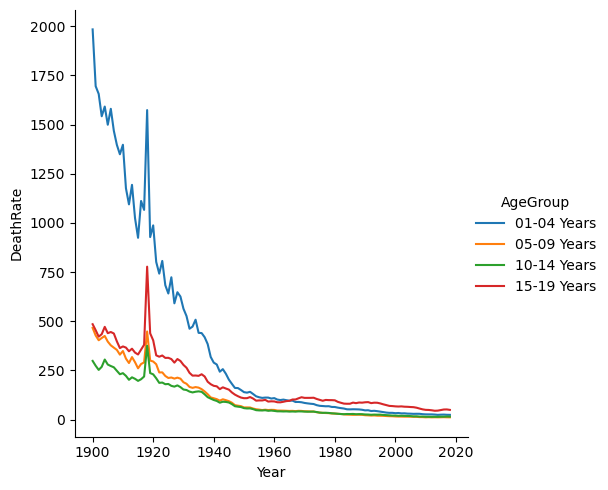

In [9]:
sns.relplot(data=mortality_data, kind='line',
            x='Year', y='DeathRate', hue='AgeGroup')

<Axes: xlabel='Year', ylabel='DeathRate'>

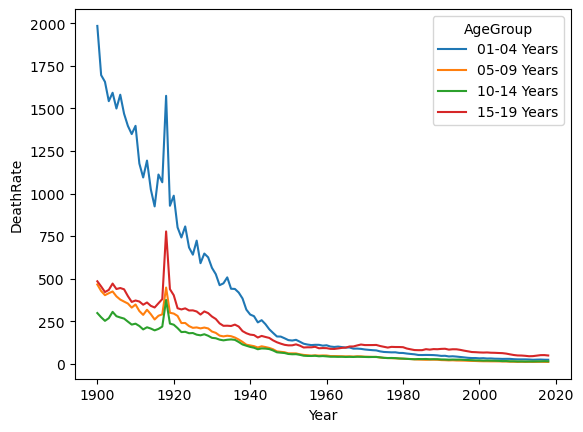

In [10]:
sns.lineplot(data=mortality_data, 
             x='Year', y='DeathRate', hue='AgeGroup')

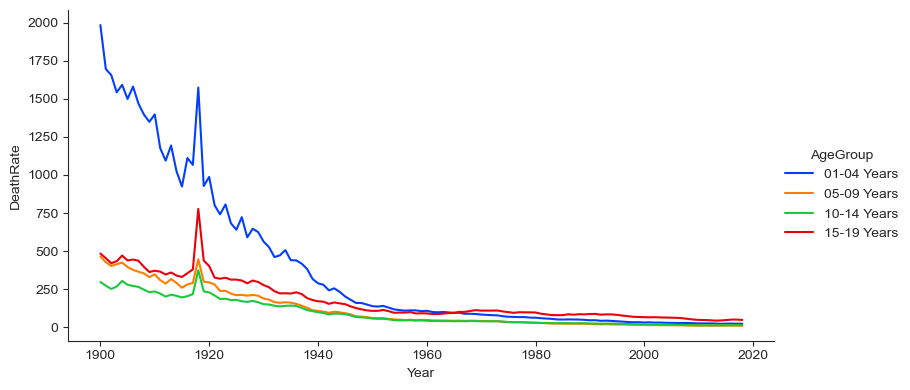

In [83]:
sns.relplot(data=mortality_data, kind='line', 
            x='Year', y='DeathRate', hue='AgeGroup', palette='bright',
            height=4, aspect=2)

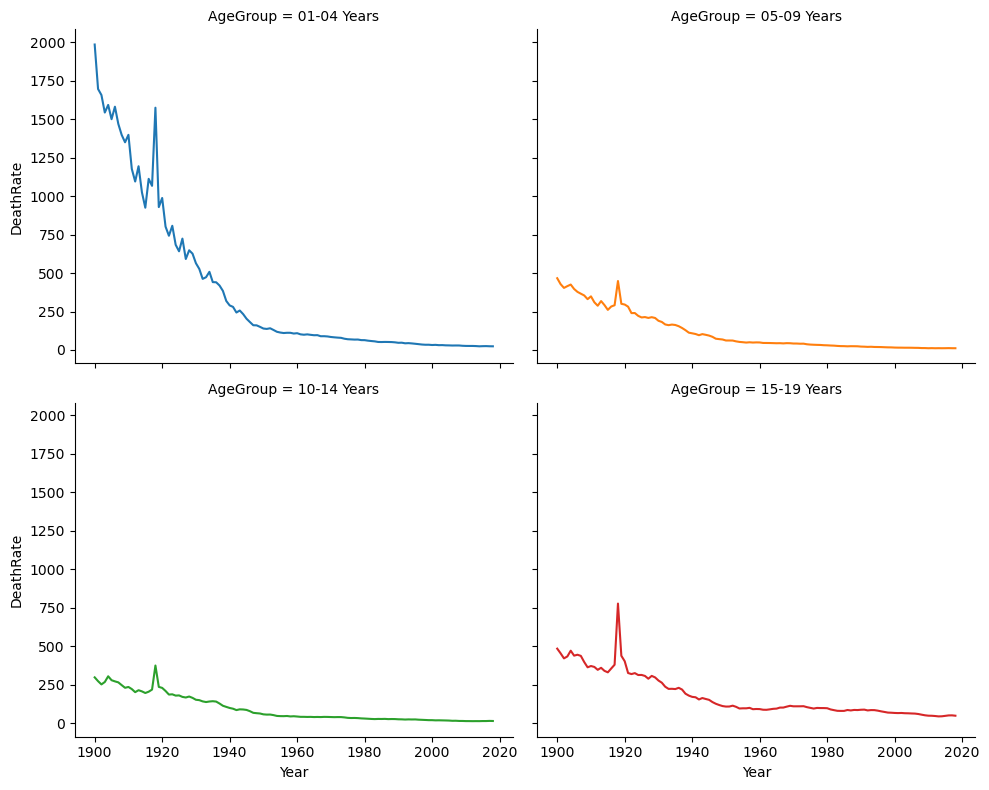

In [13]:
sns.relplot(data=mortality_data, 
            kind='line', x='Year', y='DeathRate', hue='AgeGroup', 
            height=4, aspect=1.25, 
            col='AgeGroup', col_wrap=2, legend=False)

## Enhancing plots

[Text(0.5, 1.0, 'Deaths by Age Group'), Text(0, 0.5, 'Deaths per 100,000')]

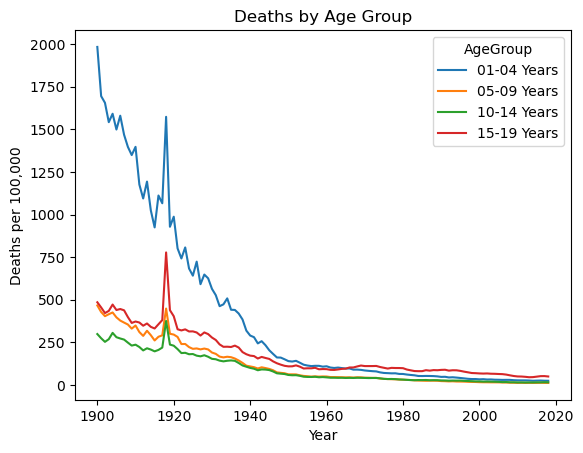

In [17]:
ax = sns.lineplot(data=mortality_data, 
                  x='Year', y='DeathRate', hue='AgeGroup')
ax.set(title='Deaths by Age Group', ylabel='Deaths per 100,000')

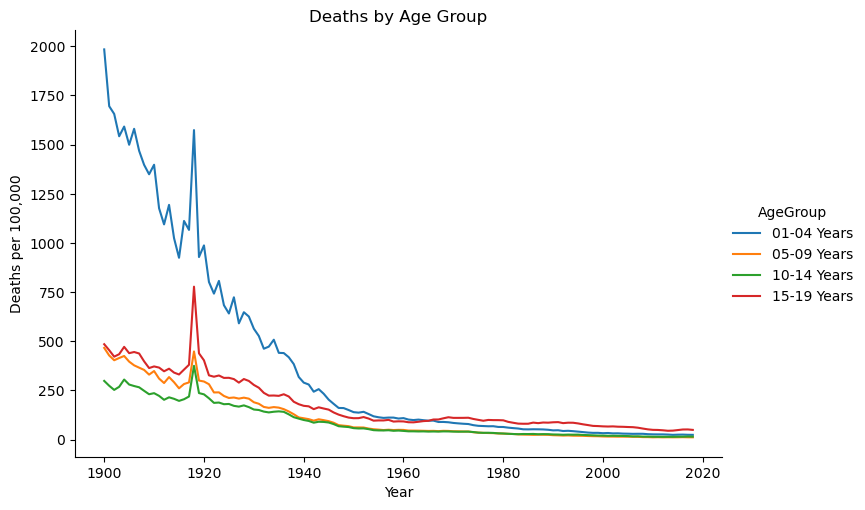

In [19]:
g = sns.relplot(data=mortality_data, kind='line',
    x='Year', y='DeathRate', hue='AgeGroup', aspect=1.5)
for ax in g.axes.flat:
    ax.set(title='Deaths by Age Group', ylabel='Deaths per 100,000')

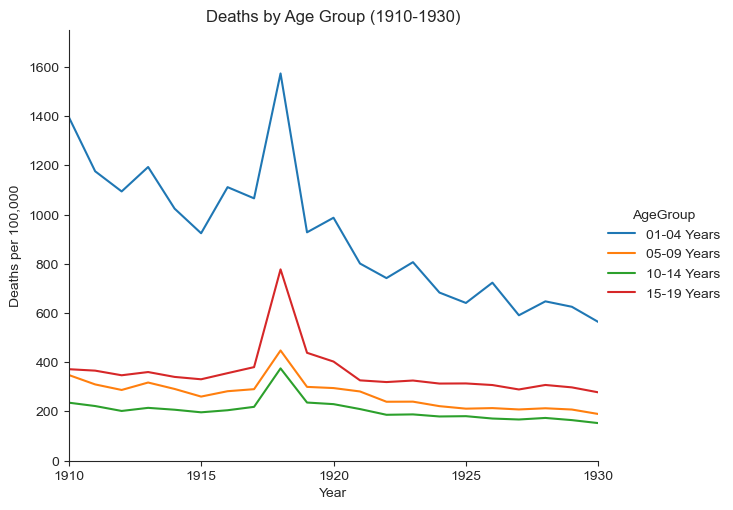

In [91]:
g = sns.relplot(data=mortality_data, kind='line',
    x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)
for ax in g.axes.flat:
    ax.set(title='Deaths by Age Group (1910-1930)', ylabel='Deaths per 100,000', 
        xticks=[x for x in range(1910, 1931, 5)], 
        xlim=(1910,1930), ylim=(0,1750))

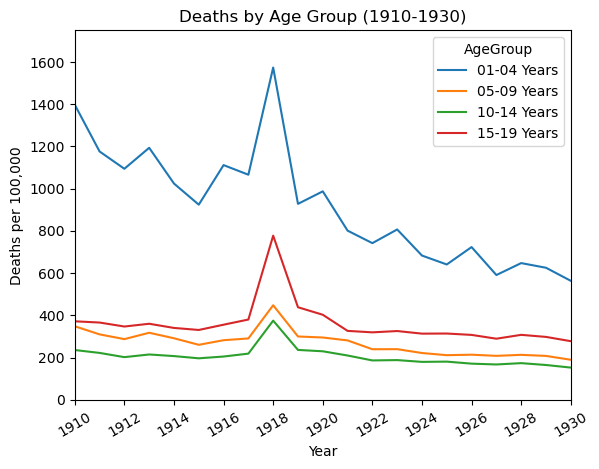

In [21]:
ax = sns.lineplot(data=mortality_data,
     x='Year', y='DeathRate', hue='AgeGroup')
ax.set(title='Deaths by Age Group (1910-1930)', 
      ylabel='Deaths per 100,000', 
      xticks=[x for x in range(1910,1931,2)], 
      xlim=(1910,1930), ylim=(0,1750))
ax.tick_params('x', labelrotation=30)

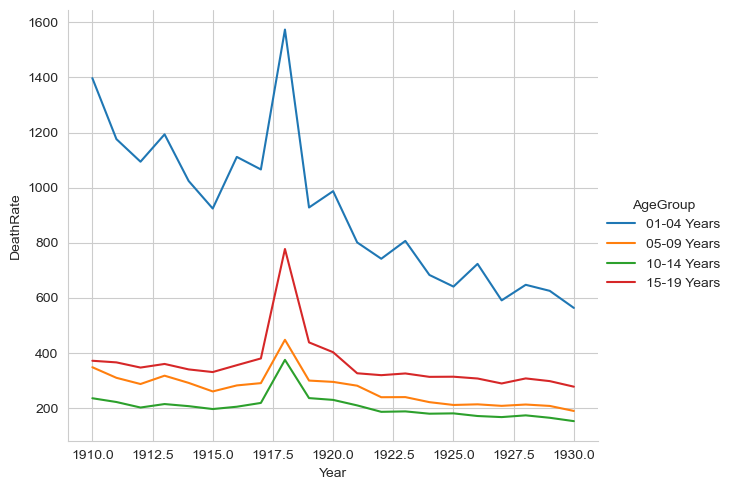

In [23]:
sns.set_style('whitegrid')
sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'),
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)

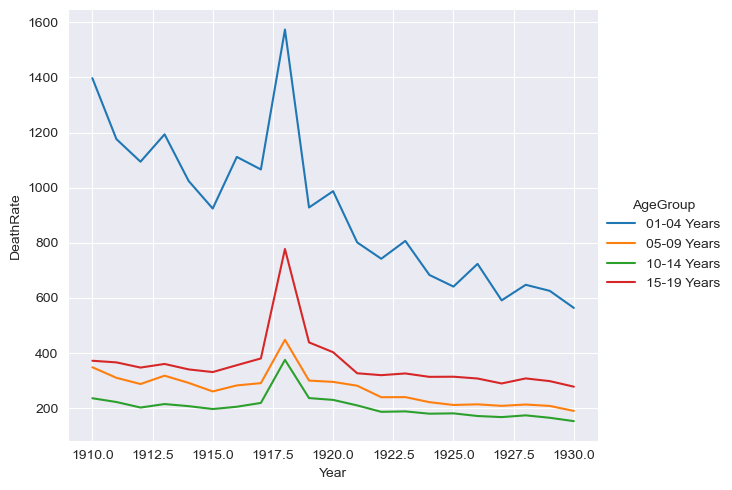

In [25]:
sns.set_style('darkgrid')
sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'),
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)

In [27]:
sns.set_style('ticks')

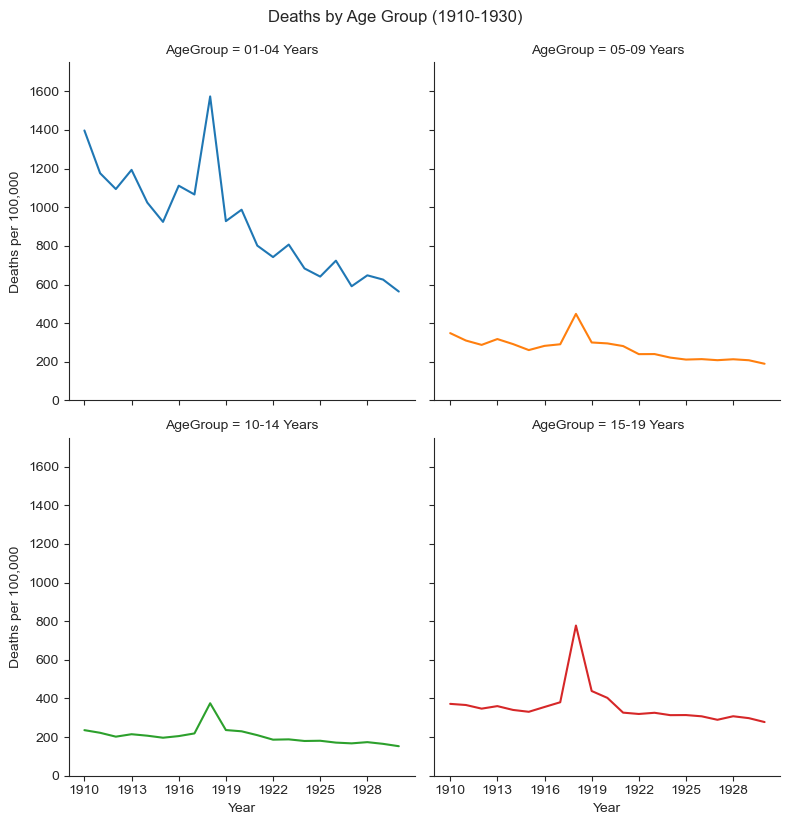

In [28]:
g = sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'),
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', legend=False,
    col='AgeGroup', col_wrap=2, height=4)
g.fig.suptitle('Deaths by Age Group (1910-1930)', y=1.025)
g.set(ylabel='Deaths per 100,000', 
      xticks=[x for x in range(1910,1931,3)], 
      ylim=(0,1750))

## Relational plots

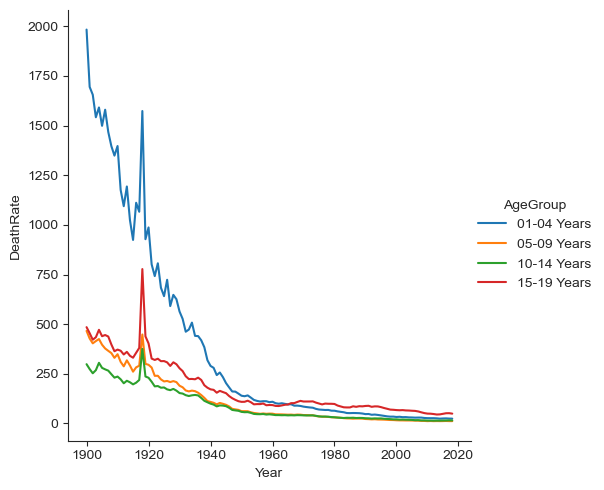

In [32]:
sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate', 
            hue='AgeGroup')

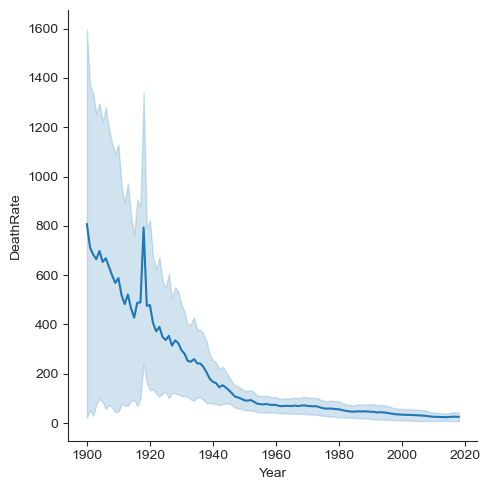

In [93]:
sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate', errorbar='sd')

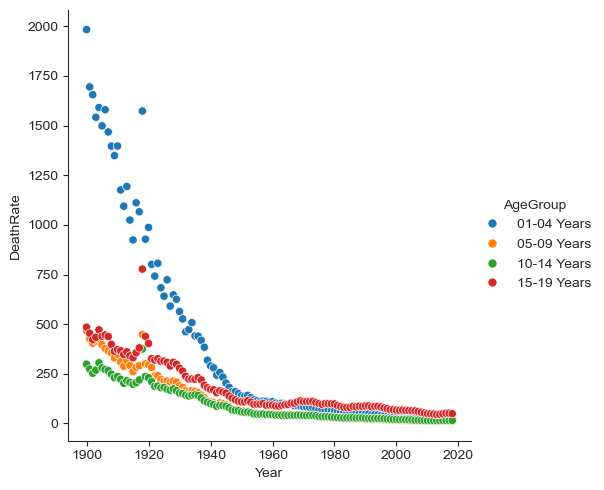

In [95]:
sns.relplot(data=mortality_data, 
            kind='scatter', x='Year', y='DeathRate', hue='AgeGroup')

[[<matplotlib.axis.XTick at 0x1959316a2d0>,

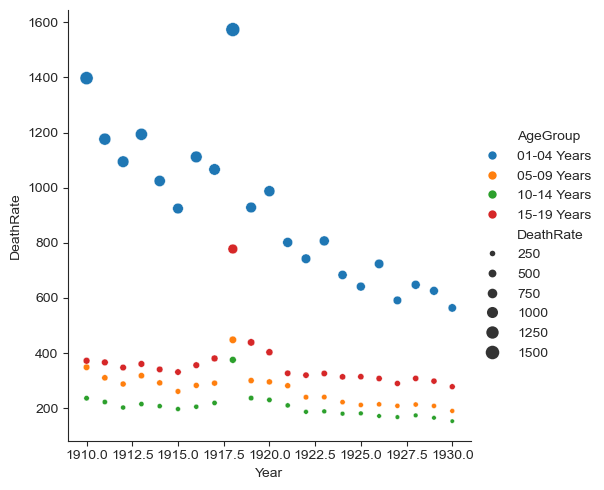

In [97]:
a = sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'), 
    x='Year', y='DeathRate', hue='AgeGroup', 
    size='DeathRate', sizes=(10,100))
ax.set(xticks=[x for x in range(1910,1931,2)])

## Categorical plots

<Axes: xlabel='Year', ylabel='DeathRate'>

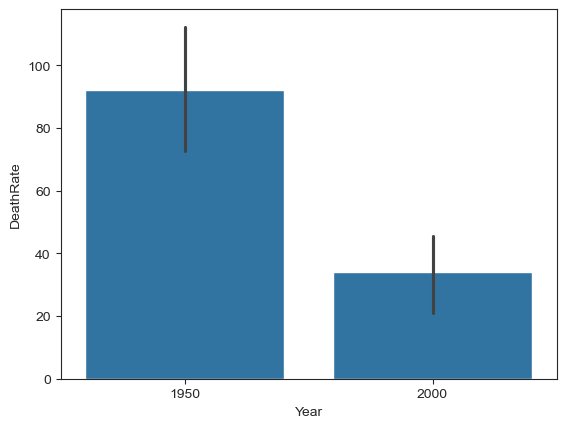

In [101]:
sns.barplot(data=mortality_data.query('Year in (1950,2000)'), 
            x='Year', y='DeathRate', errorbar=('ci',75))

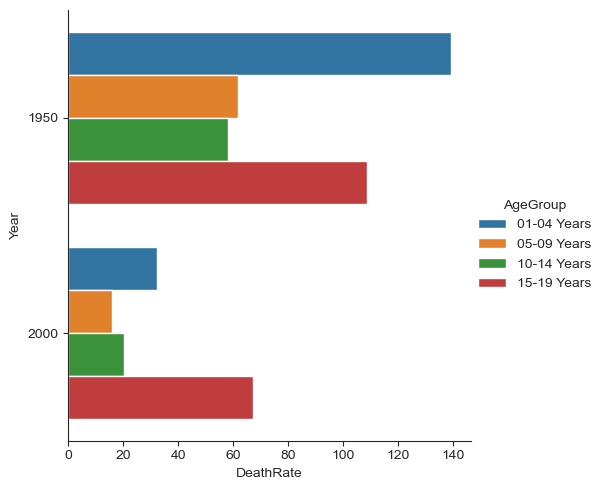

In [43]:
sns.catplot(data=mortality_data.query('Year in (1950,2000)'), 
            kind='bar', x='DeathRate', y='Year', hue='AgeGroup', orient='h')

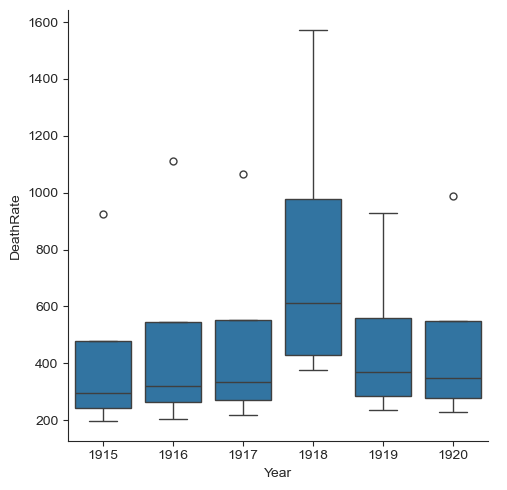

In [44]:
sns.catplot(data=mortality_data.query('Year >= 1915 and Year <= 1920'), 
            kind='box', x='Year', y='DeathRate')

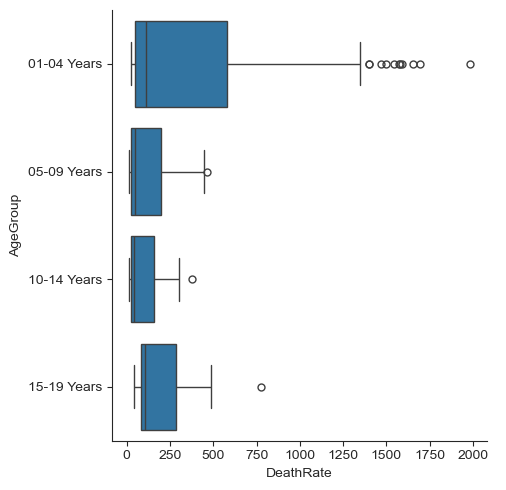

In [45]:
sns.catplot(data=mortality_data,
            kind='box', x='DeathRate', y='AgeGroup', orient='h')

## Distribution plots

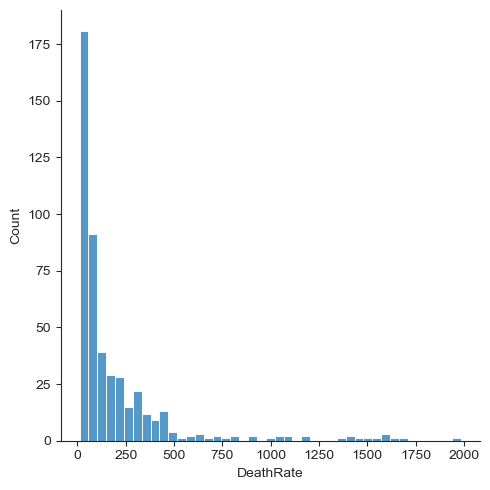

In [50]:
sns.displot(data=mortality_data, kind='hist', x='DeathRate')

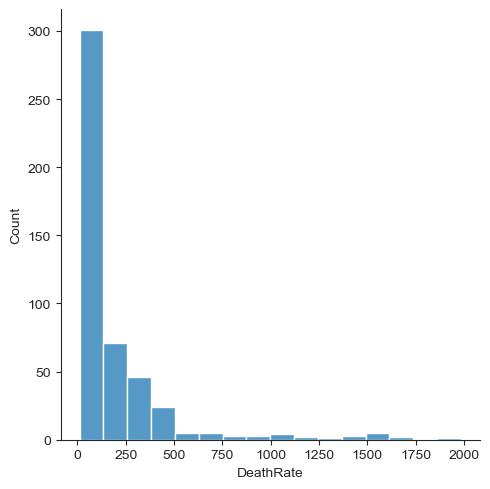

In [103]:
sns.displot(data=mortality_data, kind='hist', x='DeathRate', bins=16)

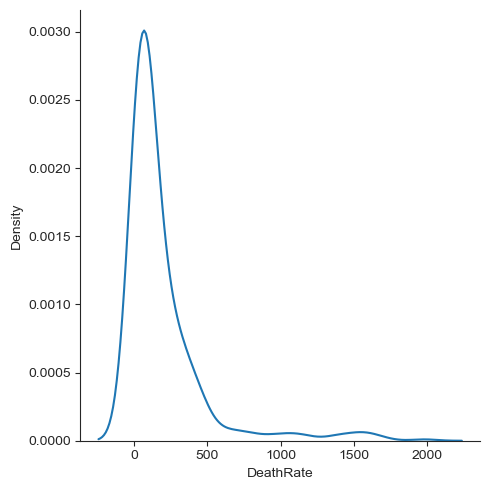

In [58]:
sns.displot(data=mortality_data, kind='kde', x='DeathRate')

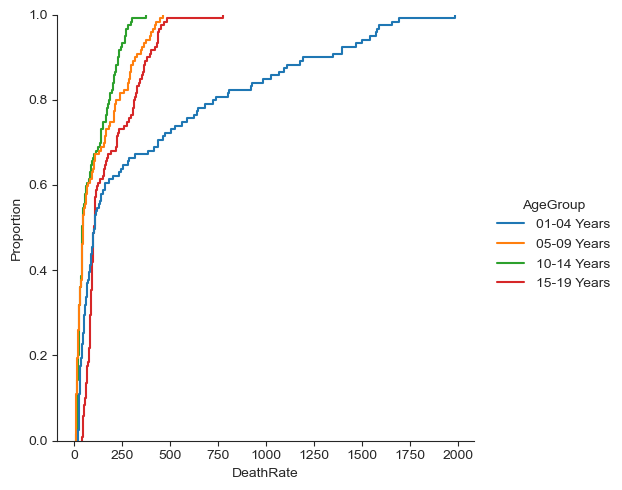

In [59]:
sns.displot(data=mortality_data, kind='ecdf', x='DeathRate', hue='AgeGroup')

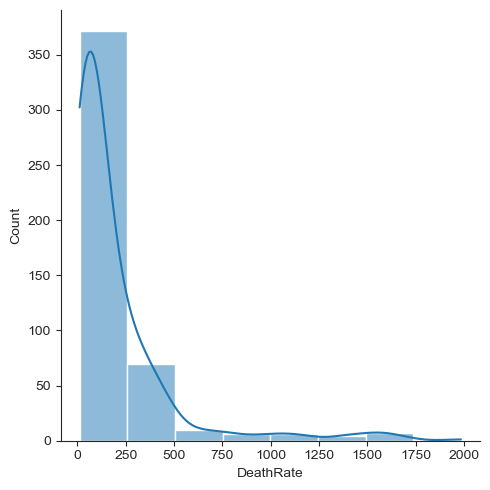

In [62]:
sns.displot(data=mortality_data, kind='hist', 
            x='DeathRate', kde=True, bins=8)

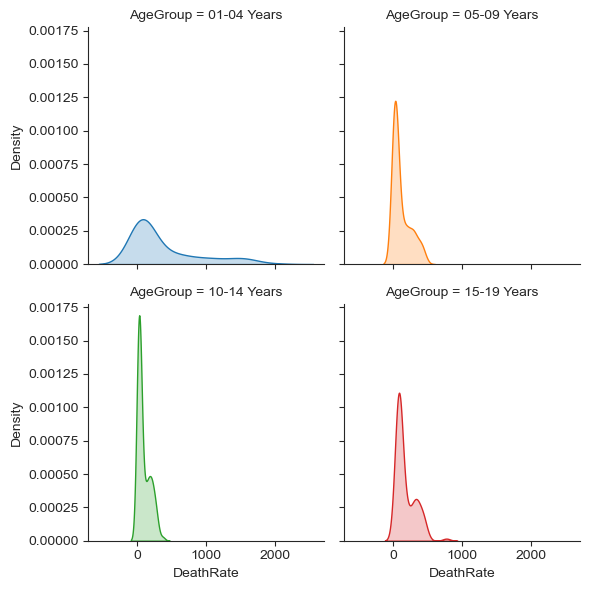

In [63]:
sns.displot(data=mortality_data, kind='kde', x='DeathRate', hue='AgeGroup', 
            fill=True, col='AgeGroup', col_wrap=2, height=3, legend=False)

## Other techniques for enhancing a plot

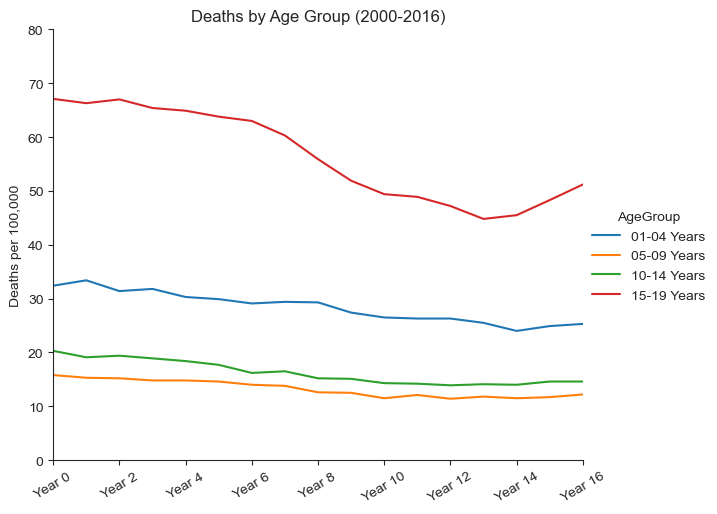

In [67]:
g = sns.relplot(
    data=mortality_data, 
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)
for ax in g.axes.flat:
    ax.set_title('Deaths by Age Group (2000-2016)')
    ax.set_xlabel('')
    ax.set_xticks([x for x in range(2000,2017,2)])
    ax.set_xticklabels(['Year ' + str(x) for x in range(0,17,2)])
    ax.tick_params('x', labelrotation=30)
    ax.set_ylabel('Deaths per 100,000')
    ax.set_xlim(2000,2016)
    ax.set_ylim(0,80)

Text(1925, 1900, 'Spanish Flu Pandemic')

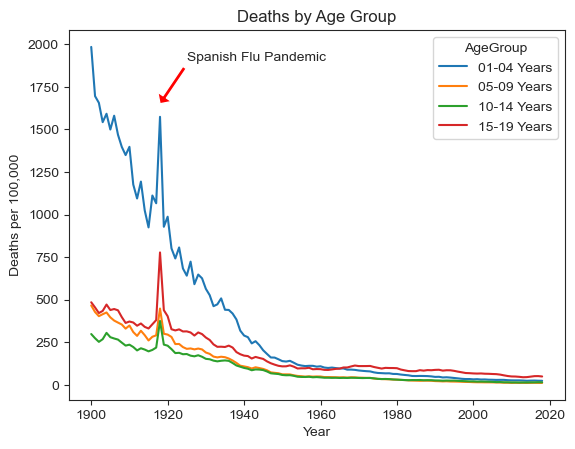

In [69]:
ax = sns.lineplot(data=mortality_data, 
                  x='Year', y='DeathRate', hue='AgeGroup')
ax.set_title('Deaths by Age Group')
ax.set_ylabel('Deaths per 100,000')
ax.annotate(text='Spanish Flu Pandemic', 
    xy=(1918, 1650), xytext=(1925, 1900), 
    arrowprops=dict(facecolor='red', width=3, headwidth=12, headlength=6))

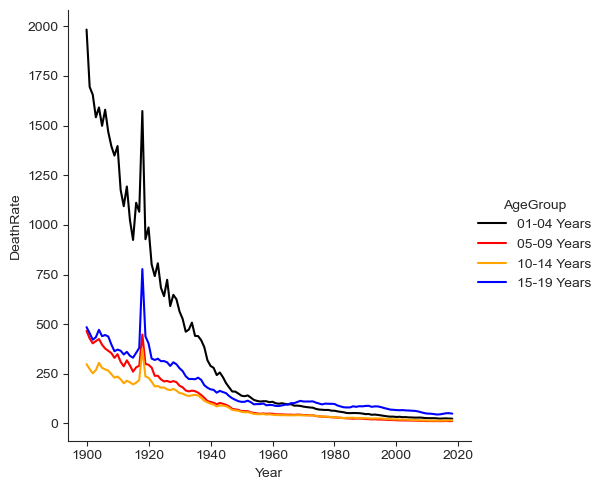

In [71]:
colors = ['black','red','orange','blue']
sns.set_palette(sns.color_palette(colors))
sns.relplot(data=mortality_data, kind='line',
            x='Year', y='DeathRate', hue='AgeGroup')

In [73]:
sns.set_palette(sns.color_palette('tab10'))

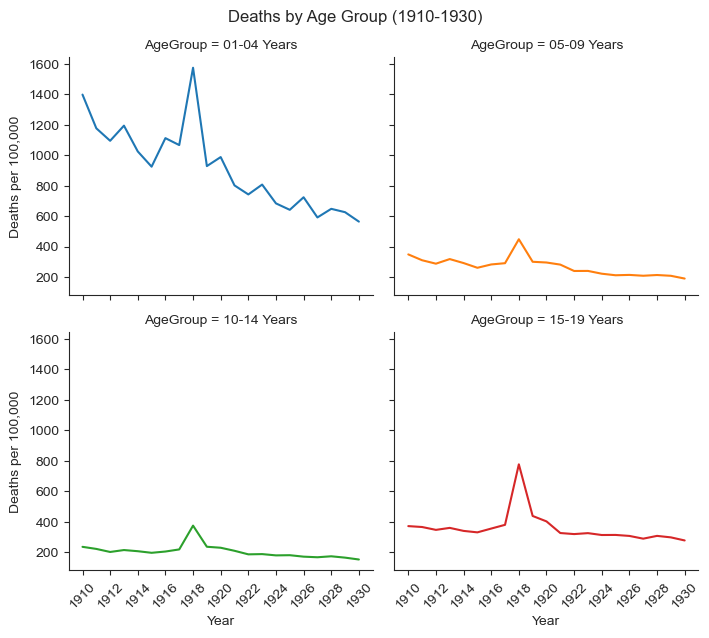

In [75]:
g = sns.relplot(
    data=mortality_data.query('Year >= 1910 and Year <= 1930'),
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', legend=False,
    col='AgeGroup', col_wrap=2, height=3, aspect=1.2)
g.fig.suptitle('Deaths by Age Group (1910-1930)', y=1.025)
for ax in g.axes.flat:
    ax.set_ylabel('Deaths per 100,000')
    ax.set_xticks([x for x in range(1910, 1931, 2)])
    ax.tick_params('x', labelrotation=45)   

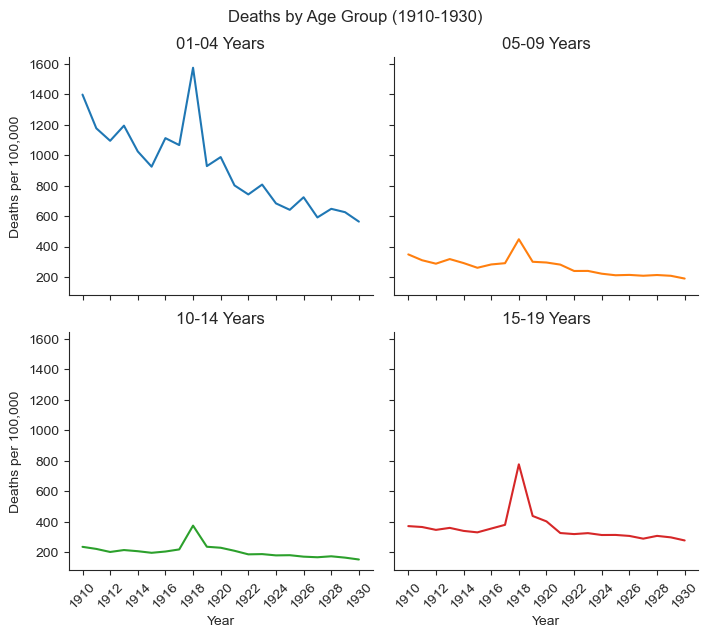

In [77]:
g = sns.relplot(
    data=mortality_data.query('Year >= 1910 and Year <= 1930'), 
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', legend=False, 
    col='AgeGroup', col_wrap=2, height=3, aspect=1.2)
g.fig.suptitle('Deaths by Age Group (1910-1930)', y=1.025)
ageGroups = mortality_data['AgeGroup'].drop_duplicates().tolist()
for index, ax in enumerate(g.axes.flat):
    ax.set_title(ageGroups[index])
    ax.set_ylabel('Deaths per 100,000')
    ax.set_xticks([x for x in range(1910, 1931, 2)])
    ax.tick_params('x', labelrotation=45)

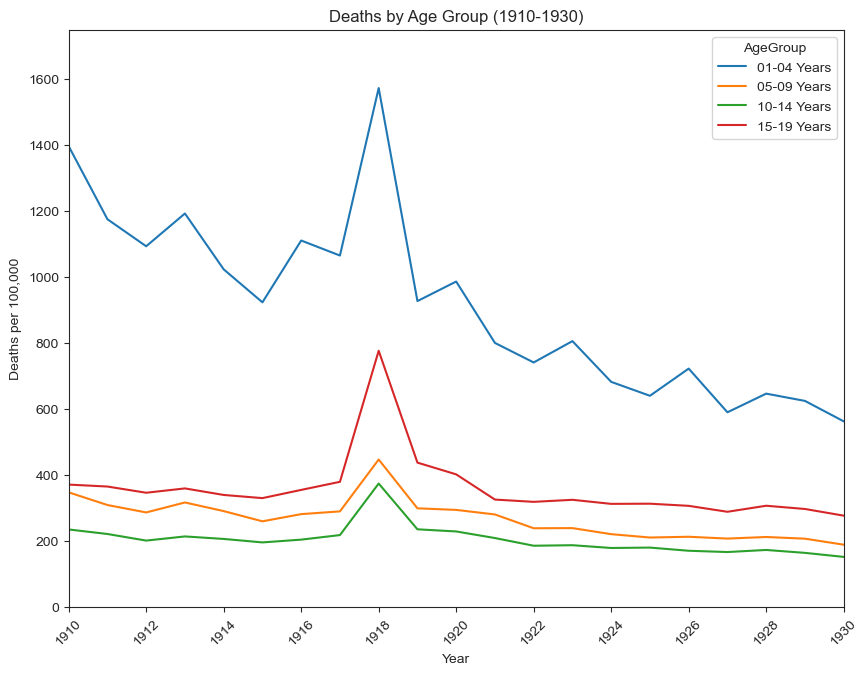

In [78]:
# import a Matplotlib module and set the figure size
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7.5)) 

# create the line plot
sns.lineplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup')

# use the ax and fig objects to enhance and save the plot
ax.set(title='Deaths by Age Group (1910-1930)', 
    ylabel='Deaths per 100,000', 
    xticks=[x for x in range(1910, 1931, 2)], 
    xlim=(1910,1930), ylim=(0,1750)),
ax.tick_params('x', labelrotation=45)

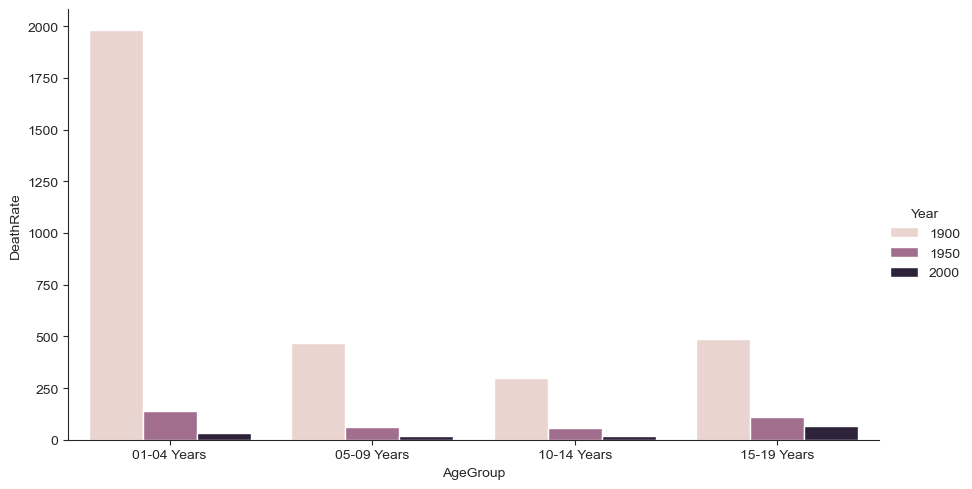

In [109]:
sns.catplot(data=mortality_data.query('Year in (1900, 1950, 2000)'),
            kind='bar', x='AgeGroup', y='DeathRate', hue='Year', aspect=1.8)

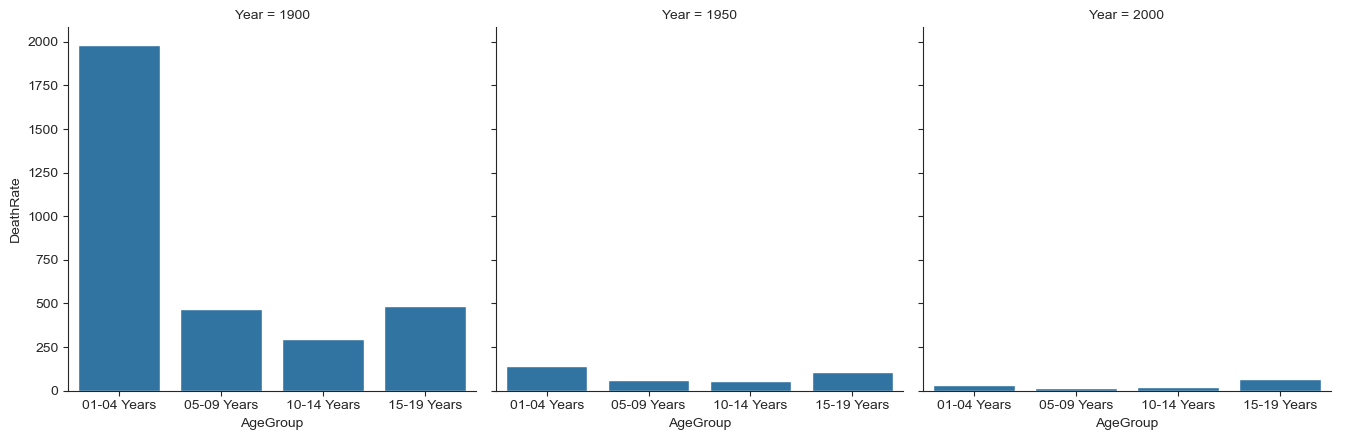

In [125]:
sns.catplot(data=mortality_data.query('Year in (1900, 1950, 2000)'),
            kind='bar', x='AgeGroup', y='DeathRate', height=4.5,
            col='Year', col_wrap=3)

[Text(0.5, 1.0, '5-9 Age Group'), Text(0, 0.5, 'Deaths per 100,000')]

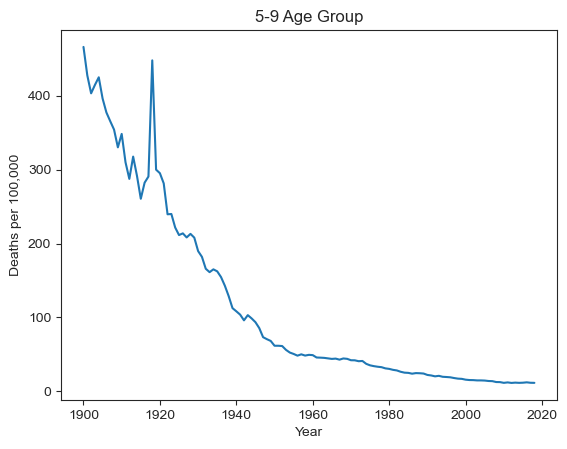

In [134]:
ax = sns.lineplot(data=mortality_data.query('AgeGroup == "05-09 Years"'), x='Year', y='DeathRate')
ax.set(title = '5-9 Age Group', ylabel='Deaths per 100,000')

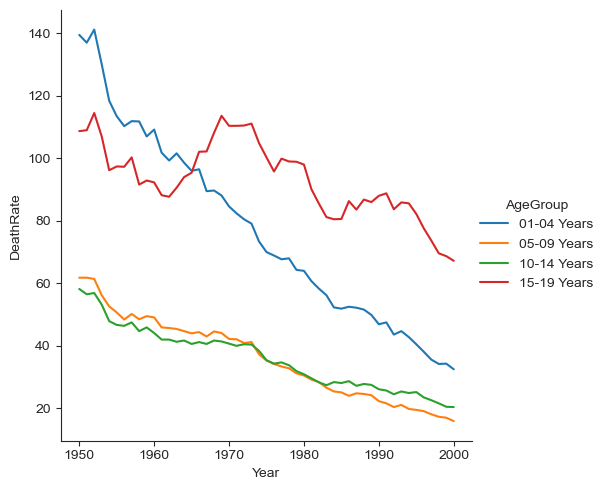

In [137]:
sns.relplot(data=mortality_data.query('Year >= 1950 and Year <= 2000'), kind='line',
            x='Year', y='DeathRate', hue='AgeGroup')

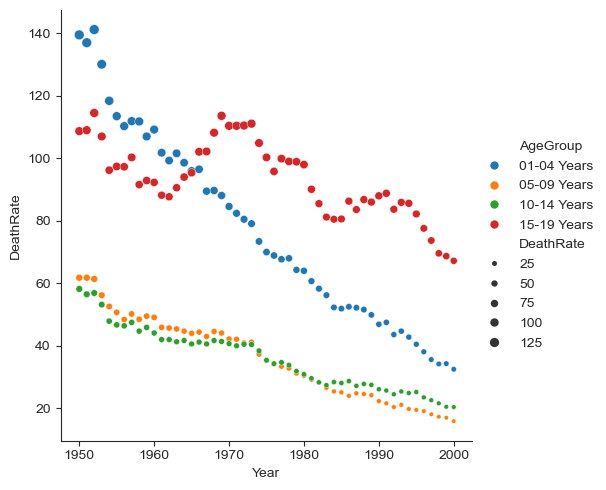

In [158]:
sns.relplot(data=mortality_data.query('Year >= 1950 and Year <= 2000'), kind='scatter',
            x='Year', y='DeathRate', hue='AgeGroup', size='DeathRate', sizes=(10,50))

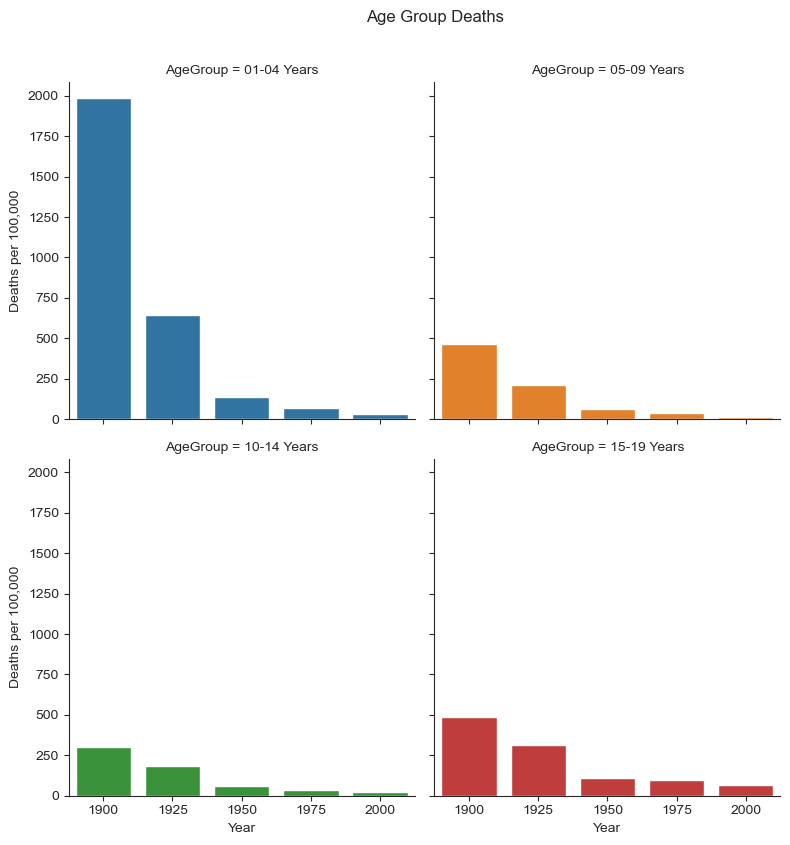

In [200]:
g = sns.catplot(data=mortality_data.query('Year in (1900, 1925, 1950, 1975, 2000)'),
               kind='bar', x='Year', y='DeathRate', hue='AgeGroup', legend=False,
               col='AgeGroup', col_wrap=2, height=4)
g.fig.suptitle('Age Group Deaths', y=1.05, x=.55)
for ax in g.axes.flat:
    ax.set(ylabel='Deaths per 100,000')
g.savefig('barCharts.png')